In [87]:
import re
import copy
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as snb
from wordcloud import WordCloud
from PIL import Image
from matplotlib import cm
from matplotlib import colors

import pymorphy2

In [2]:
posts = pd.read_csv('Data/final_posts.csv', index_col=0)

In [3]:
posts

,text,length,date,type,index in posts,domain,index_before_concat
0,сегодня вы можете почувствовать незащищенность...,339,11 декабря,business,0,ribyhoroscop,0
1,вам звёзды рекомендуют сегодня больше работать...,303,11 декабря,love,0,ribyhoroscop,1
2,"если сегодня вы почувствуете робость, или, тог...",215,11 декабря,simple,0,ribyhoroscop,2
3,сегодня звезды рекомендуют вам заняться коррек...,278,10 декабря,business,1,ribyhoroscop,3
4,"сегодня ваш любимый человек признается в том, ...",273,10 декабря,love,1,ribyhoroscop,4
...,...,...,...,...,...,...,...
26957,"день преобразования космических энергий, получ...",544,2 марта,simple,2648,strelechoroscop,4575
26958,завтра - полон перемен для вас. поэтому строит...,256,1 марта,simple,2649,strelechoroscop,4576
26959,утром не мешкая приступайте к работе или завяз...,441,28 февраля,simple,2650,strelechoroscop,4577
26960,общительность и дружелюбие вас сегодня могут н...,453,27 февраля,simple,2651,strelechoroscop,4578


In [4]:
date_pattern = re.compile(r'([1-9]?[0-9]) +(.+)')

In [5]:
day = []
month = []
for date in posts.date:
    if date is np.nan:
        day += [None]
        month += [None]
        continue
    res = re.findall(date_pattern, date)
    if len(res) == 0:
        print(date)
    else:
        day += [res[0][0]]
        month += [res[0][1]]

In [6]:
posts['day'] = day
posts['month'] = month

In [7]:
posts.drop(['date', 'index in posts', 'index_before_concat'], axis=1, inplace=True)

# Season

In [8]:
posts

,text,length,type,domain,day,month
0,сегодня вы можете почувствовать незащищенность...,339,business,ribyhoroscop,11,декабря
1,вам звёзды рекомендуют сегодня больше работать...,303,love,ribyhoroscop,11,декабря
2,"если сегодня вы почувствуете робость, или, тог...",215,simple,ribyhoroscop,11,декабря
3,сегодня звезды рекомендуют вам заняться коррек...,278,business,ribyhoroscop,10,декабря
4,"сегодня ваш любимый человек признается в том, ...",273,love,ribyhoroscop,10,декабря
...,...,...,...,...,...,...
26957,"день преобразования космических энергий, получ...",544,simple,strelechoroscop,2,марта
26958,завтра - полон перемен для вас. поэтому строит...,256,simple,strelechoroscop,1,марта
26959,утром не мешкая приступайте к работе или завяз...,441,simple,strelechoroscop,28,февраля
26960,общительность и дружелюбие вас сегодня могут н...,453,simple,strelechoroscop,27,февраля


In [9]:
months = [ 'декабря', 'января', 'февраля',
          'марта', 'апреля', 'мая',
          'июня', 'июля', 'августа',
          'сентября', 'октября', 'ноября']

In [10]:
def get_season(month):
    if month is np.nan or month is None:
        return None
    if month in months[0:3]:
        return 'winter'
    if month in months[3:6]:
        return 'spring'
    if month in months[6:9]:
        return 'summer'
    if month in months[9:12]:
        return 'autumn'
    return '???'

In [11]:
posts['season'] = posts.month.map(get_season)

In [12]:
posts.season.value_counts()

spring    6841
autumn    6801
winter    6574
summer    6517
Name: season, dtype: int64

In [195]:
posts

,text,length,type,domain,day,month,season
0,сегодня вы можете почувствовать незащищенность...,339,business,ribyhoroscop,11,декабря,winter
1,вам звёзды рекомендуют сегодня больше работать...,303,love,ribyhoroscop,11,декабря,winter
2,"если сегодня вы почувствуете робость, или, тог...",215,simple,ribyhoroscop,11,декабря,winter
3,сегодня звезды рекомендуют вам заняться коррек...,278,business,ribyhoroscop,10,декабря,winter
4,"сегодня ваш любимый человек признается в том, ...",273,love,ribyhoroscop,10,декабря,winter
...,...,...,...,...,...,...,...
26957,"день преобразования космических энергий, получ...",544,simple,strelechoroscop,2,марта,spring
26958,завтра - полон перемен для вас. поэтому строит...,256,simple,strelechoroscop,1,марта,spring
26959,утром не мешкая приступайте к работе или завяз...,441,simple,strelechoroscop,28,февраля,winter
26960,общительность и дружелюбие вас сегодня могут н...,453,simple,strelechoroscop,27,февраля,winter


# Wordclouds

In [131]:
%%time
text_split = re.split('[– \-,\.?!\\/()»«“”#%=;:*+_=]+', ' '.join(posts.text))
#text_split = (' '.join(text_split)).split(' ')
while '' in text_split:
    text_split.remove('')

Wall time: 532 ms


In [132]:
text_split[:20]

['сегодня',
 'вы',
 'можете',
 'почувствовать',
 'незащищенность',
 'и',
 'неуверенность',
 'в',
 'собственных',
 'силах',
 'попробуйте',
 'проанализировать',
 'ситуацию',
 'и',
 'выяснить',
 'что',
 'же',
 'так',
 'сильно',
 'выбило']

In [133]:
print(len(set(text_split)), len(text_split))

46854 1158318


In [134]:
morph = pymorphy2.MorphAnalyzer()

In [135]:
%%time
lst = list(map(lambda word: morph.parse(word)[0][2], text_split))

Wall time: 27.5 s


In [190]:
# Create a list of word
text=' '.join(text_split)
 
# Create the wordcloud object
wordcloud = WordCloud(width=1920, height=1080, margin=0, 
                      background_color='#F1F2F2', 
                      colormap=cm.twilight_shifted).generate(text)


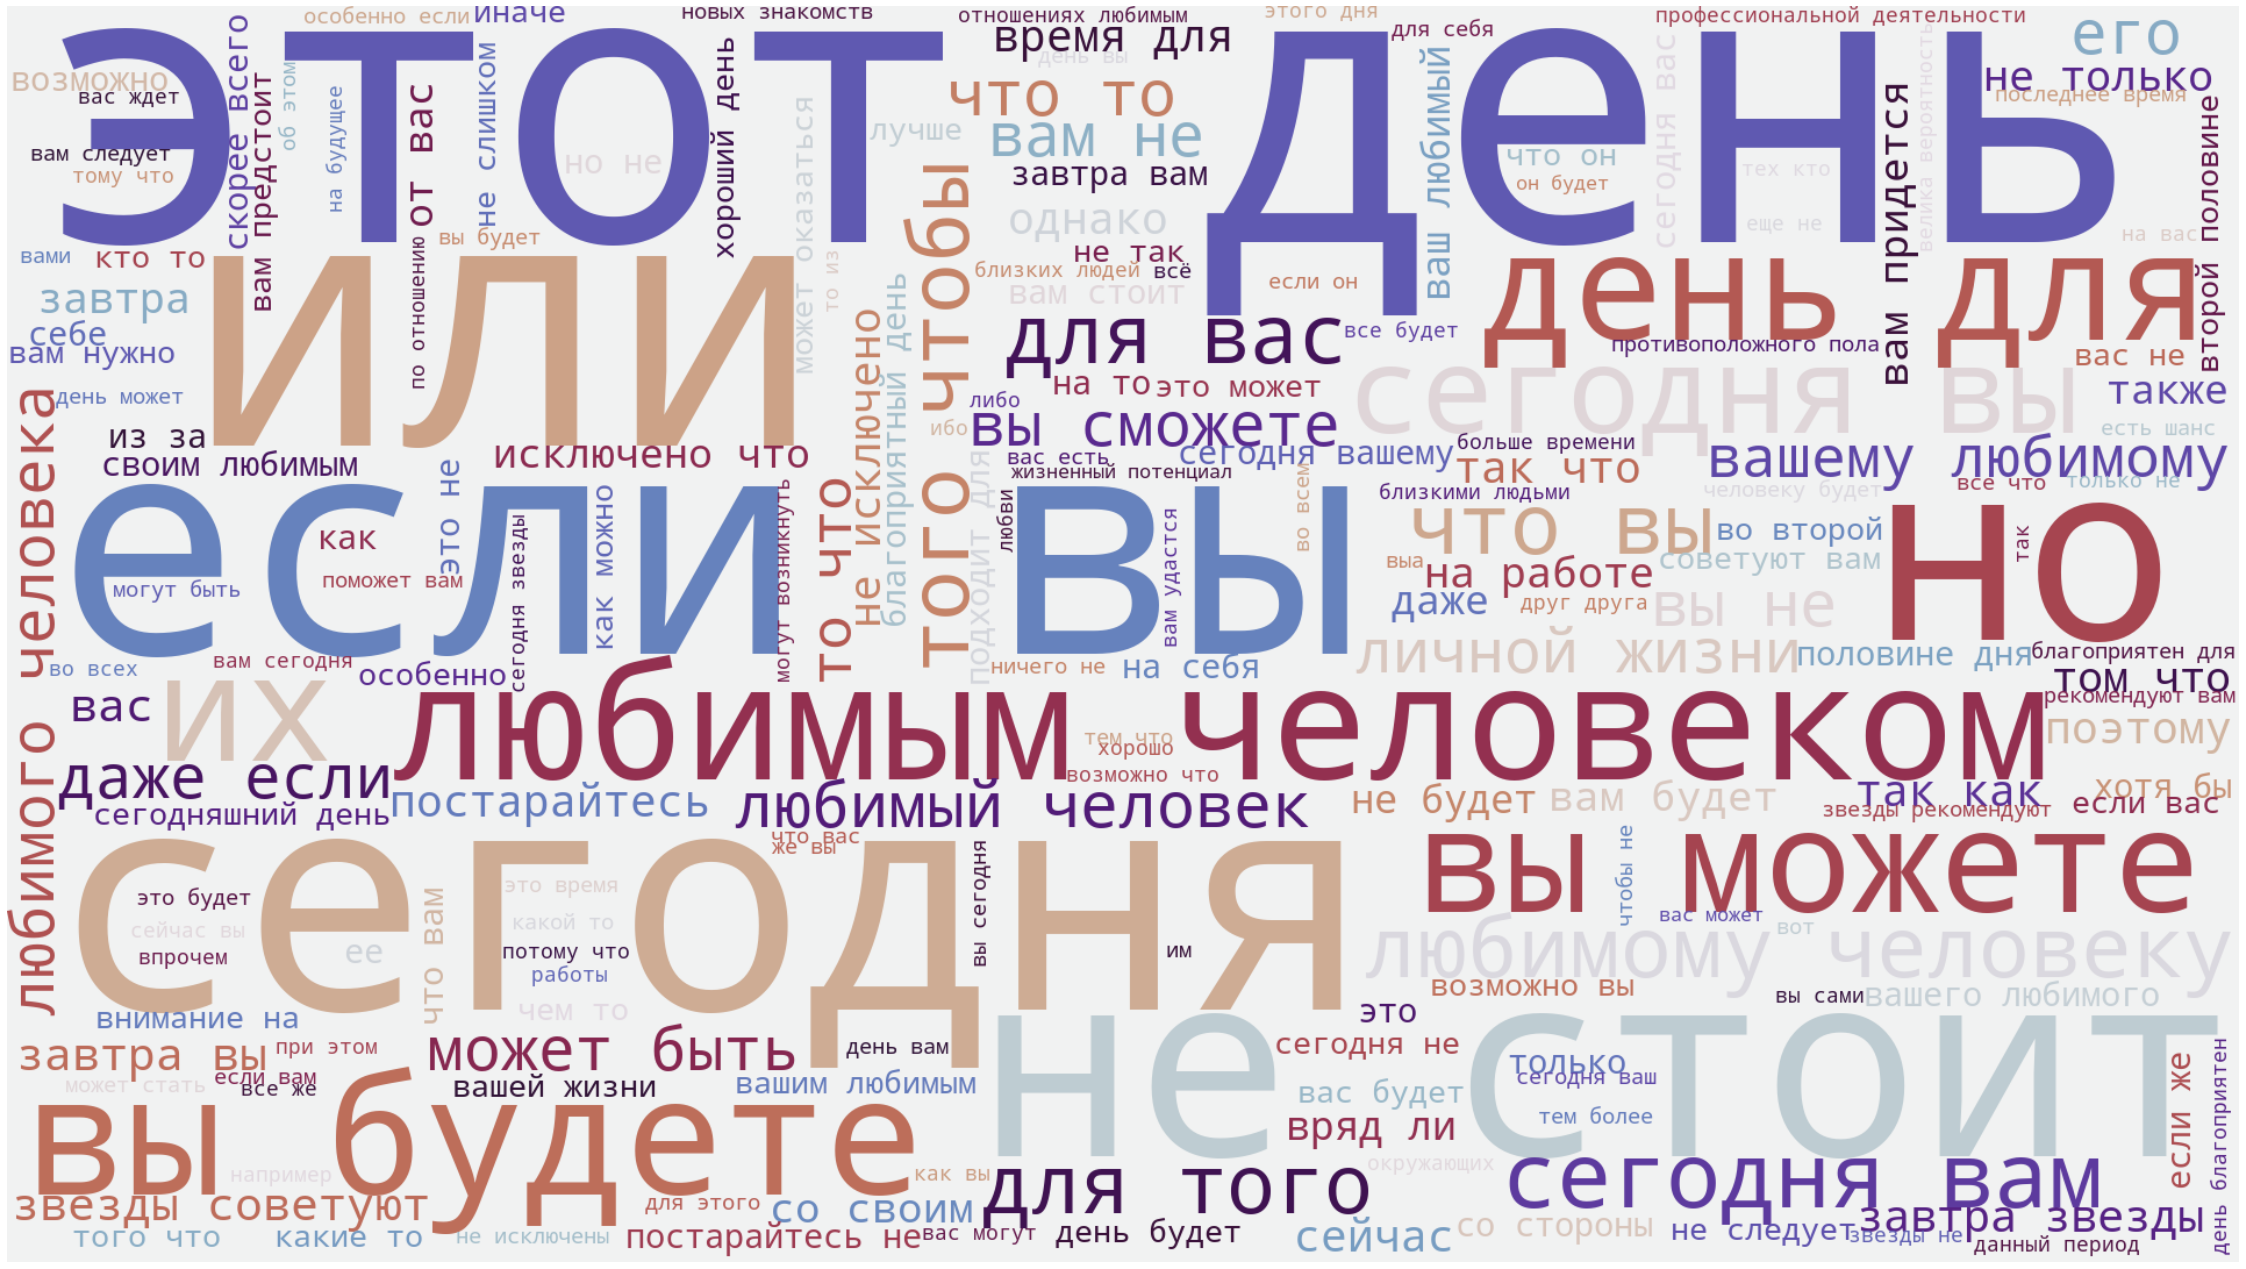

In [191]:
# Display the generated image:
plt.figure(figsize=(40, 40))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig('wordcloud1.png')
plt.show()

In [136]:
tuples = list(dict(Counter(text_split)).items())

In [137]:
tuples = sorted(tuples, key=lambda tup: tup[1], reverse=True)
tuples[:30]

[('и', 40361),
 ('в', 31732),
 ('не', 28209),
 ('вы', 19858),
 ('на', 16686),
 ('с', 14526),
 ('вам', 13697),
 ('что', 12653),
 ('день', 10086),
 ('вас', 9848),
 ('для', 9843),
 ('сегодня', 9434),
 ('то', 8678),
 ('будет', 8334),
 ('или', 8231),
 ('к', 8172),
 ('если', 7884),
 ('завтра', 7042),
 ('это', 6079),
 ('все', 5694),
 ('может', 5591),
 ('а', 5196),
 ('от', 5124),
 ('как', 4831),
 ('у', 4583),
 ('стоит', 4348),
 ('этот', 4262),
 ('но', 4249),
 ('чтобы', 4224),
 ('его', 3865)]

In [185]:
stop_words = ('и в не вы на с вам что для вас или к если это все а от как у этот но чтобы то его ваша ' +
              'о так даже по то за себя быть он их только того которые со ему бы можете же свои свою до своей ' + 
              'из есть вашей себе они однако из можно ваши чем во этого тем своих своим всем она оно без этом свой ' +
              'под им ее её при еще ещё вами выа те лишь нет всё поэтому либо нибудь ли ваш том всего ' +
              'пусть хотя свое кто над об вашу сами этим вот ваши кого уже своего ваши вместе ваше вашему где своему ' +
              'какие них когда перед ним чего него вряд которое ваших какой тому которых самое тому вполне ' + 
              'иначе да вашим ведь совсем любой раз вашего всегда всех своими васе водолею '
             )
stop_words = list(set(stop_words.split(' ')))

In [186]:
%%time
tmp_tup = copy.deepcopy(tuples)
for tup in tmp_tup:
    if tup[0] in stop_words:
        tuples.remove(tup)

Wall time: 422 ms


In [187]:
tuples[:30]

[('день', 10086),
 ('сегодня', 9434),
 ('будет', 8334),
 ('завтра', 7042),
 ('может', 5591),
 ('стоит', 4348),
 ('время', 3780),
 ('могут', 3272),
 ('будут', 3150),
 ('возможно', 3000),
 ('звезды', 2751),
 ('постарайтесь', 2596),
 ('будете', 2566),
 ('жизни', 2462),
 ('человеком', 2396),
 ('очень', 2388),
 ('лучше', 2370),
 ('придется', 2096),
 ('сейчас', 1994),
 ('дня', 1885),
 ('любимым', 1879),
 ('отношения', 1757),
 ('дела', 1700),
 ('сделать', 1647),
 ('нужно', 1633),
 ('человека', 1618),
 ('просто', 1603),
 ('следует', 1588),
 ('человек', 1585),
 ('больше', 1544)]

In [188]:
# Create the wordcloud object
wordcloud = WordCloud(width=1920, height=1080, margin=0, 
                      background_color='#F1F2F2', 
                      colormap=cm.twilight_shifted).generate_from_frequencies(dict(tuples))


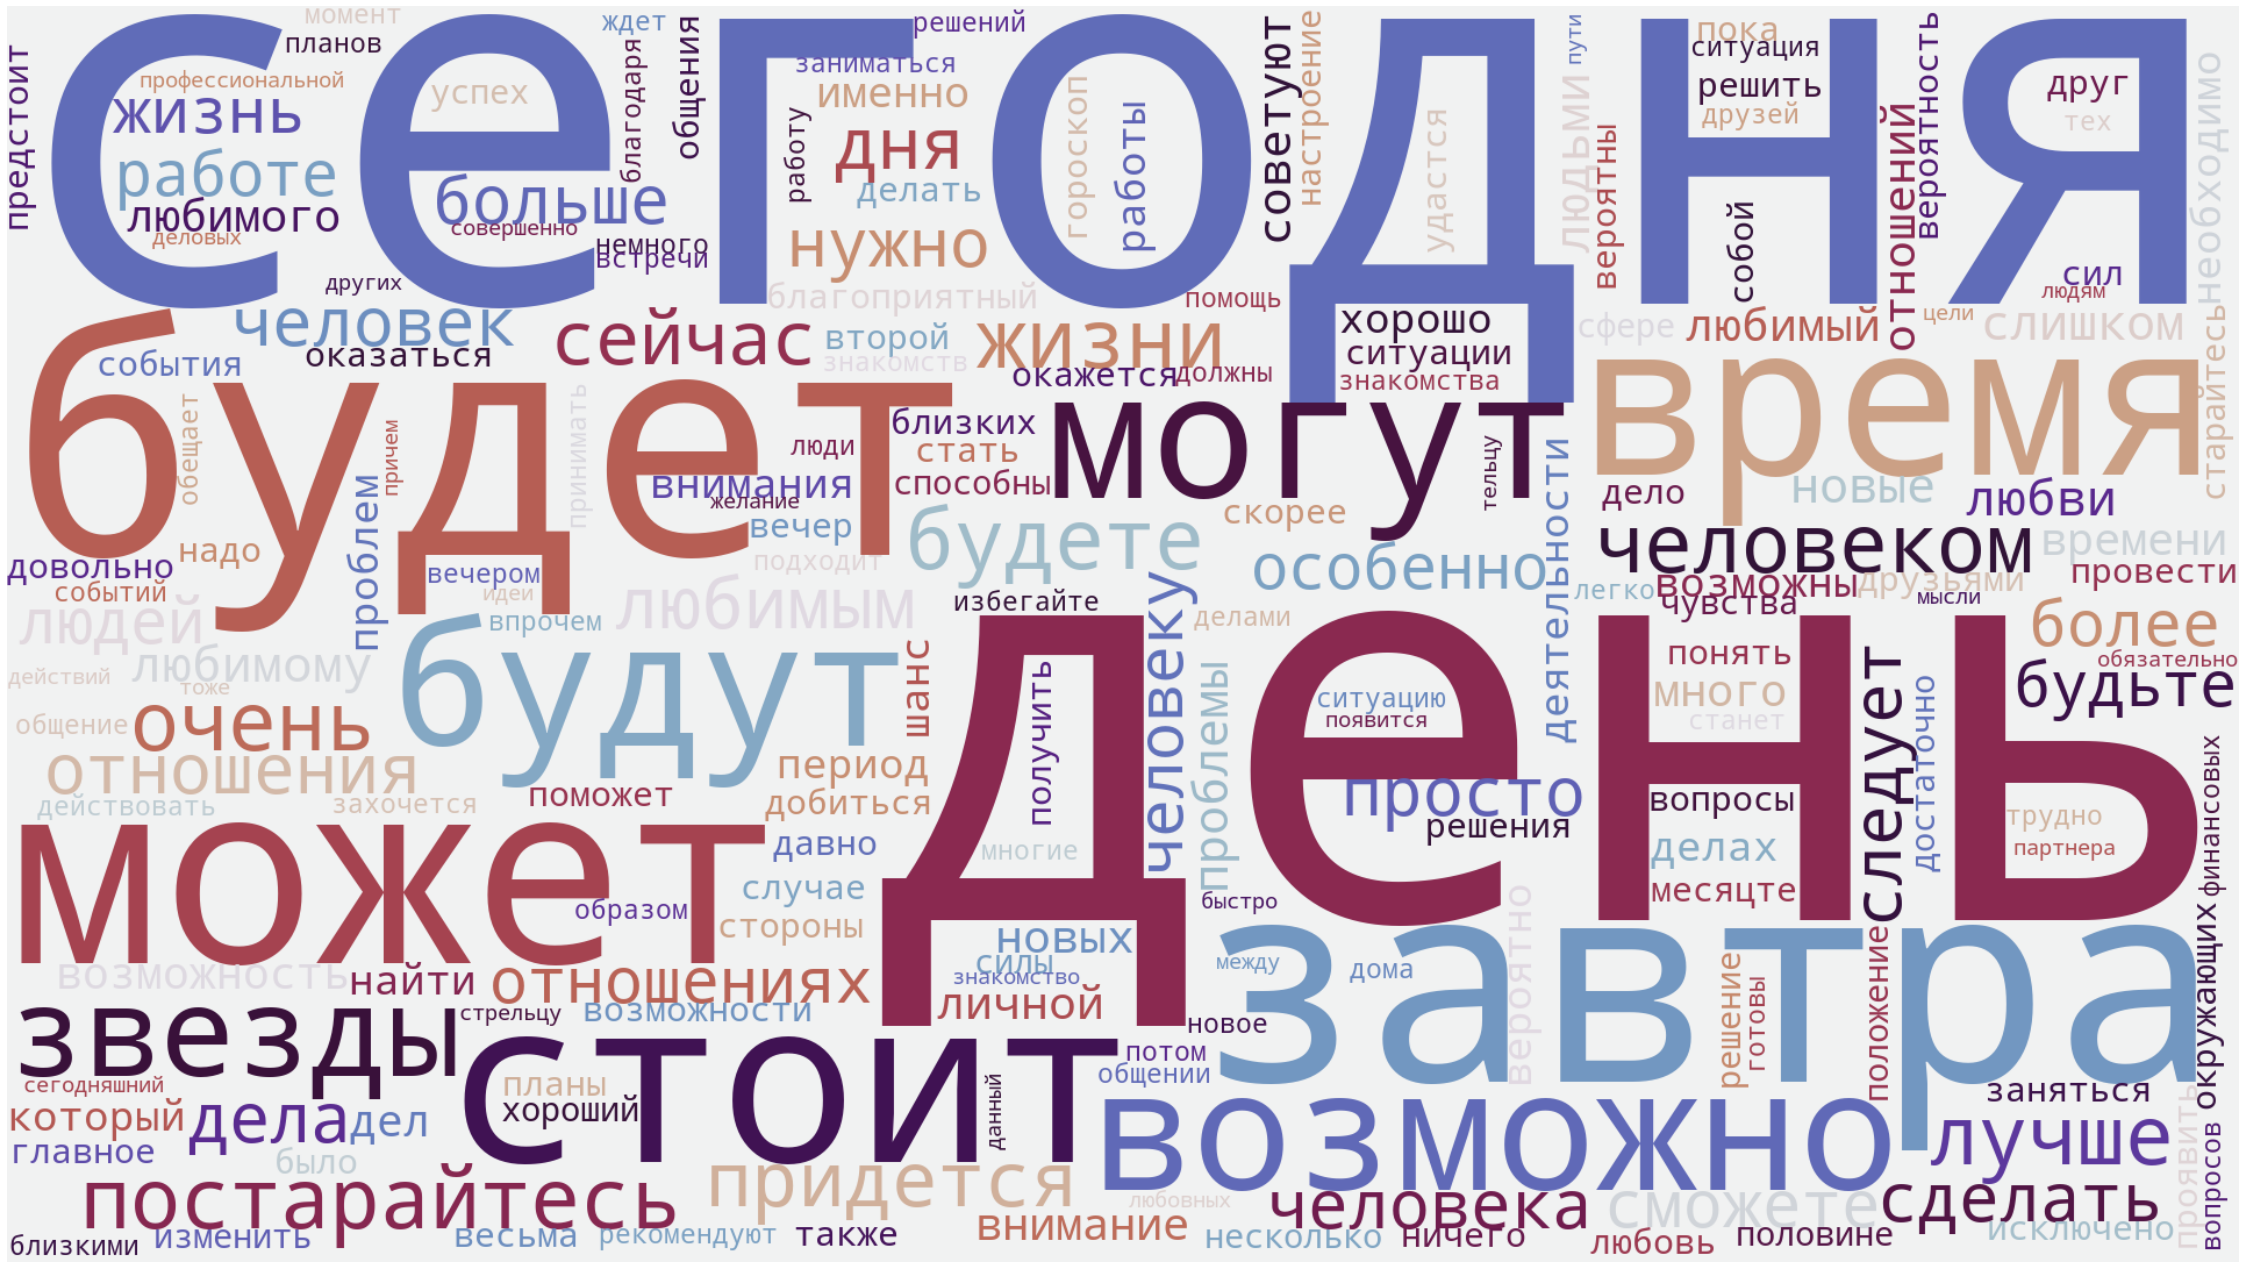

In [189]:
# Display the generated image:
plt.figure(figsize=(40, 40))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig('wordcloud2.png')
plt.show()